# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202006 
## SECTION: Descriptive statistics
### VIDEO: Computing central tendency
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

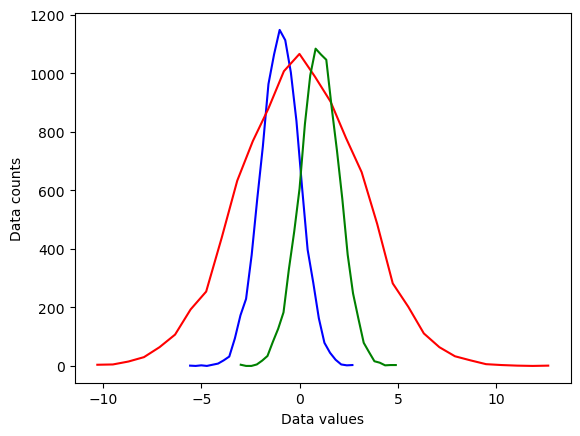

In [14]:
## create some data distributions

# the distributions
N = 10001   # number of data points
nbins = 30  # number of histogram bins

#we create normaly distributed random numbers
d1 = np.random.randn(N) - 1 #shifted by one to the left
d2 = 3*np.random.randn(N)   # centered around 0 but with wider distribution due to *3
d3 = np.random.randn(N) + 1 #shifted by one to the right

# need their histograms
#create based their median values of each bar
#the way this x1 works is. We take each elemnt starting for the second one until the end and
#the first one until the end -1 and we get their median for each one of them. Could be done 
#with a for loop but this is afancy way of doing it.
y1,x1 = np.histogram(d1,nbins)
# print((x1[1:]+x1[:-1])/2)
# print(x1)
# print(x1[:-1])
x1 = (x1[1:]+x1[:-1])/2

y2,x2 = np.histogram(d2,nbins)
x2 = (x2[1:]+x2[:-1])/2

y3,x3 = np.histogram(d3,nbins)
x3 = (x3[1:]+x3[:-1])/2


# plot them
plt.plot(x1,y1,'b')
plt.plot(x2,y2,'r')
plt.plot(x3,y3,'g')

plt.xlabel('Data values')
plt.ylabel('Data counts')
plt.show()

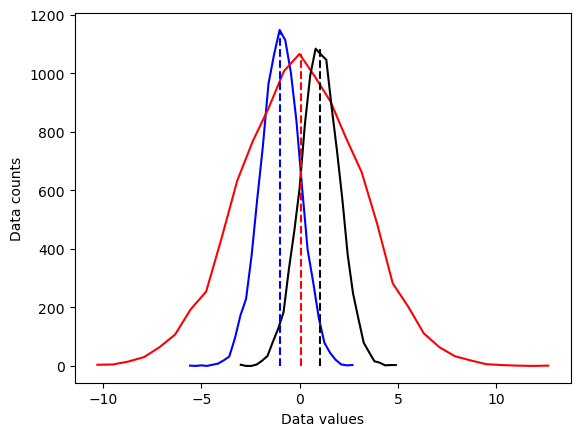

In [17]:
## overlay the mean

# compute the means
mean_d1 = sum(d1) / len(d1) #sum all the values and / with the number of elements
mean_d2 = np.mean(d2)
mean_d3 = np.mean(d3)

# plot them
plt.plot(x1,y1,'b', x2,y2,'r', x3,y3,'k')
plt.plot([mean_d1,mean_d1],[0,max(y1)],'b--')
plt.plot([mean_d2,mean_d2],[0,max(y2)],'r--')
plt.plot([mean_d3,mean_d3],[0,max(y3)],'k--')

plt.xlabel('Data values')
plt.ylabel('Data counts')
plt.show()

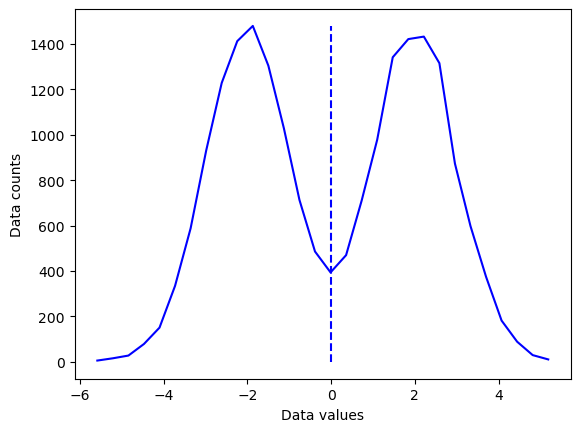

In [19]:
## "failure" of the mean. The mean her fails to be representative of the central tendency

# new dataset of distribution combinations
#concatinating 2 normal distributions one shifted to the left and one to the right
d4 = np.hstack( (np.random.randn(N)-2,np.random.randn(N)+2) )
# and its histogram
[y4,x4] = np.histogram(d4,nbins)
x4 = (x4[:-1]+x4[1:])/2

# and its mean
mean_d4 = np.mean(d4)


plt.plot(x4,y4,'b')
plt.plot([mean_d4,mean_d4],[0,max(y4)],'b--')

plt.xlabel('Data values')
plt.ylabel('Data counts')
plt.show()

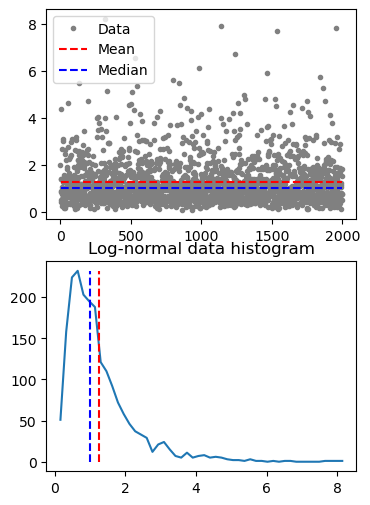

In [20]:
## median

# create a log-normal distribution. Very good for the example here because it's skewed to the right
shift   = 0
stretch = .7
n       = 2000
nbins   = 50

# generate data
data = stretch*np.random.randn(n) + shift
data = np.exp( data )

# and its histogram
y,x = np.histogram(data,nbins)
x = (x[:-1]+x[1:])/2

# compute mean and median
datamean = np.mean(data)
datamedian = np.median(data)


# plot data
fig,ax = plt.subplots(2,1,figsize=(4,6))
ax[0].plot(data,'.',color=[.5,.5,.5],label='Data')
ax[0].plot([1,n],[datamean,datamean],'r--',label='Mean')
ax[0].plot([1,n],[datamedian,datamedian],'b--',label='Median')
ax[0].legend()

ax[1].plot(x,y)
ax[1].plot([datamean,datamean],[0,max(y)],'r--')
ax[1].plot([datamedian,datamedian],[0,max(y)],'b--')
ax[1].set_title('Log-normal data histogram')
plt.show()

In [22]:
## mode

data = np.round(np.random.randn(10))

uniq_data = np.unique(data)
for i in range(len(uniq_data)):
    print(f'{uniq_data[i]} appears {sum(data==uniq_data[i])} times.')

print(' ')
print('The modal value is %g'%stats.mode(data)[0][0])


-2.0 appears 2 times.
-1.0 appears 1 times.
-0.0 appears 3 times.
1.0 appears 4 times.
 
The modal value is 1


/var/folders/f2/gq8xgm9x491cqwtct_tgpy0h0000gn/T/ipykernel_18706/3832225992.py:10: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print('The modal value is %g'%stats.mode(data)[0][0])
